In [40]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

from sklearn.cluster import AffinityPropagation
from sklearn import metrics


# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

## Define a cluster method comparison function

In [141]:
def cluster_comparison(X_trn, y_trn, centers):
    
    ### Define the models ###
    
    ### K means
    # Define the number of clusters
    n_clusters=len(set(y_trn))
    # Calculate predicted values.
    k_y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_trn)

    ### Mean Shift
    # Set bandwidth
    bandwidth = estimate_bandwidth(X_trn, quantile=0.2, n_samples=500)
    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_trn)
    # Extract cluster assignments for each data point.
    ms_labels = ms.labels_
    # Coordinates of the cluster centers.
    ms_cluster_centers = ms.cluster_centers_

    ### Spectral
    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_trn)
    #Predicted clusters.
    sc_predict=sc.fit_predict(X_trn)
    
    ### Affinity propagation
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation(preference=-50, damping=0.9).fit(X_trn)
    # Pull the number of clusters and cluster assignments for each data point.
    af_cluster_centers_indices = af.cluster_centers_indices_
    af_n_clusters_ = len(af_cluster_centers_indices)
    af_labels = af.labels_
    

    ### Plot the figures ###
    
    plt.figure(figsize=(12,8))
    
    ### K means
    ax1 = plt.subplot(221)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=k_y_pred)  
    plt.scatter([x[0] for x in centers], [x[1] for x in centers],
                s=300, marker='*', color='black', alpha=0.2)
    plt.title('K means')
    
    ### Mean shift
    ax2 = plt.subplot(222)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=ms_labels)
    plt.scatter([x[0] for x in centers], [x[1] for x in centers],
                s=300, marker='*', color='black', alpha=0.2)    
    plt.title("Mean Shift (Est. clusters: {})".format(len(np.unique(ms_labels))))
    
    ### Spectral
    ax3 = plt.subplot(223)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=sc_predict)
    plt.scatter([x[0] for x in centers], [x[1] for x in centers],
                s=300, marker='*', color='black', alpha=0.2)
    plt.title('Spectral')
    
    ### Affinity propagation
    ax4 = plt.subplot(224)
    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(af_n_clusters_), colors):
        class_members = af_labels == k
        cluster_center = X_trn[af_cluster_centers_indices[k]]
        plt.plot(X_trn[class_members, 0], X_trn[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_trn[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)      
    
    plt.scatter([x[0] for x in centers], [x[1] for x in centers],
                s=300, marker='*', color='black', alpha=0.2)
    plt.title('Affinity Propagation (Est. clusters: {})'.format(af_n_clusters_))
    
    plt.show()
    
    
    ### Print crosstabs ###
    
    print('K means crosstabs:')
    print(pd.crosstab(k_y_pred, y_trn))
    
    print('\nMean shift crosstabs:')
    print(pd.crosstab(ms_labels, y_trn))
    
    print('\nSpectral crosstabs:')
    print(pd.crosstab(sc_predict, y_trn))

## Set 1 (K=2)

/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


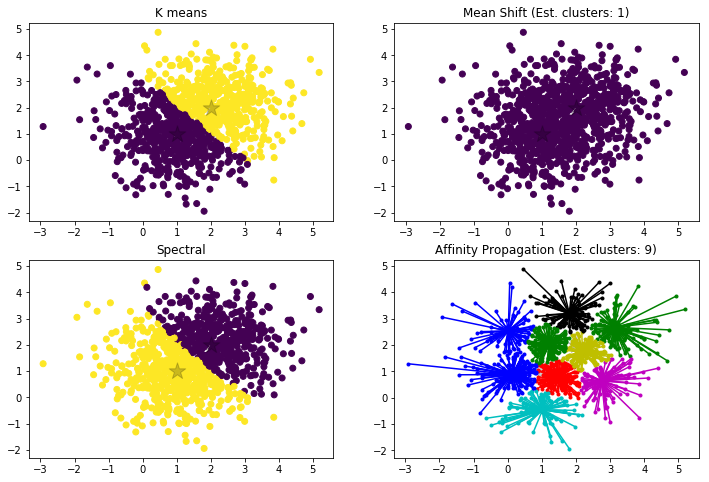

K means crosstabs:
col_0    0    1
row_0          
0      397  120
1      115  368

Mean shift crosstabs:
col_0    0    1
row_0          
0      512  488

Spectral crosstabs:
col_0    0    1
row_0          
0      106  359
1      406  129


In [142]:
### Set 1
centers_1 = [[1, 1], [2, 2]]

X1, y1 = make_blobs(n_samples=10000,
                    centers=centers_1,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.9, random_state=42)

cluster_comparison(X1_train, y1_train, centers_1)

## Set 2 (K=4)

/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


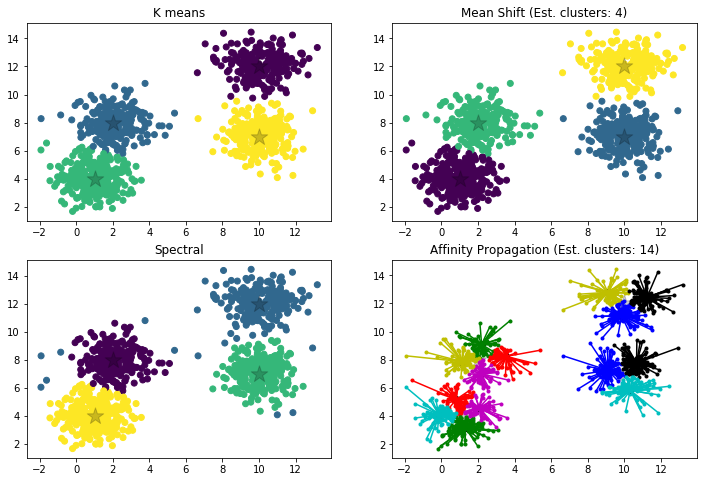

K means crosstabs:
col_0    0    1    2    3
row_0                    
0        0    0  236    1
1        1  230    0    0
2      272    9    0    0
3        0    0    2  249

Mean shift crosstabs:
col_0    0    1    2    3
row_0                    
0      272    9    0    0
1        0    0    2  249
2        1  230    0    0
3        0    0  236    1

Spectral crosstabs:
col_0    0    1    2    3
row_0                    
0        1  226    0    0
1        2    4  237    6
2        0    0    1  244
3      270    9    0    0


In [131]:
### Set 2
centers_2 = [[1, 4], [2, 8], [10, 12], [10, 7]]

X2, y2 = make_blobs(n_samples=10000,
                    centers=centers_2,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.9, random_state=42)

cluster_comparison(X2_train, y2_train, centers_2)

## Set 3 (k=8)

/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


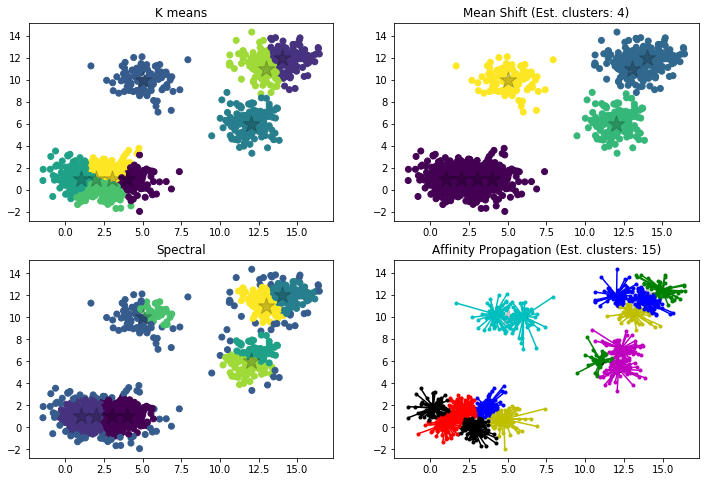

K means crosstabs:
col_0   0   1   2   3   4   5    6    7
row_0                                  
0       1   5  26  66   0   0    0    0
1       0   0   0   0  90  45    0    0
2       0   0   0   0   0   0    0  110
3       0   0   0   0   0   0  140    0
4      98  45   7   2   0   0    0    0
5      24  44  45  18   0   0    0    0
6       0   0   0   0  34  69    0    0
7      15  41  51  24   0   0    0    0

Mean shift crosstabs:
col_0    0    1    2    3    4    5    6    7
row_0                                        
0      138  135  129  110    0    0    0    0
1        0    0    0    0  124  113    0    0
2        0    0    0    0    0    1  140    0
3        0    0    0    0    0    0    0  110

Spectral crosstabs:
col_0    0   1   2   3   4   5   6   7
row_0                                 
0        9  40  85  86   0   0   0   0
1      102  82  28   5   0   0   0   0
2       27  13  16  19  18  15  11  67
3        0   0   0   0  76  37   0   0
4        0   0   0   0   0 

In [132]:
centers_3 = [[1, 1], [2, 1], [3, 1], [4, 1], [14,12], [13,11], [12,6], [5,10]]

### Set 3
X3, y3 = make_blobs(n_samples=10000,
                    centers=centers_3,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.9, random_state=42)

cluster_comparison(X3_train, y3_train, centers_3)

## Takeaways

__K means__ appears to be a pretty consistent performer in these cases, where there aren't many clusters and K is able to be determined using silhouette coefficients or the elbow method. It's not fantastic at distinguishing overlapping groups (see set 3), but performed better than mean shift or spectral clustering at identifying them. However, it does have the drawback of needing to have K manually tweaked. In scenarios where there are many clusters, it's a suboptimal solution. 

__Mean shift__ clustering had a lot of difficulty distinguishing between clusters that were close together. It wasn't able to shine in this activity relative to K means and spectral clustering because K was concretely known at the outset & selecting K is one of its strengths. 

__Affinity propagation__ clustering was the best of the four at identifying the distinctions between close-together clusters, but it also required the most tweaking and consistently overestimated the number of clusters. It would be more appropriate to cases with more clusters than were in any of my sets.